# Least squares example 1

In this notebook, we will determine parameters for the equation

\begin{equation}
y = 3 + 2.2x
\end{equation}

by least squares regression. That is, we will fit an equation on the form

\begin{equation}
y = a + b \cdot x
\end{equation}

to data from the line $y = 3 + 2.2x$.

Of course, here we know that $a=3$ and $b=2.2$, but we will
pretend we do not know this, and we will see if we can find those parameters by doing
a least squares fit. Our approach is the following:

1. We generate some x and y values that follow the relation $y = 3 + 2.2 x$.

2. We fit an equation on the form $y = a + b\cdot x$ to the generated values,
   and we check if get $a=3$ and $b=2.2$.

## Generating values for $y= 3 + 2.2x$

In [2]:
# We import some libraries for generating values and plotting:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme(style="ticks", context="notebook", palette="muted")
%matplotlib inline

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 5.2  7.4  9.6 11.8 14.  16.2 18.4 20.6 22.8 25. ]


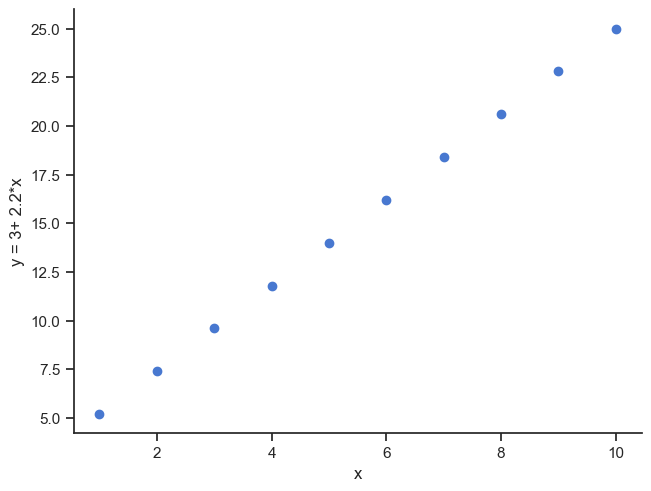

In [3]:
# Generate some values we will use for solving the least squares problem:
x = np.linspace(1, 10, 10)
print(x)
y = 3 + 2.2 * x
print(y)
# Also plot them:
fig, ax = plt.subplots(constrained_layout=True)
ax.set(xlabel="x", ylabel="y = 3+ 2.2*x")
ax.scatter(x, y)
sns.despine(fig=fig)

## Option 1: Explicitly implementing the equations:

The least squares solution to $y = a + bx$ is given by:

\begin{equation}
a = \overline{y} - b \overline{x}, \quad b = \frac{\sum_{i} (y_i - \overline{y})(x_i - \overline{x})}{\sum_i (x_i - \overline{x})^2}, 
\end{equation}

where $\overline{y}$ denotes the mean of $y$. We can evaluate this directly:

In [4]:
# Find the differences y_i - mean(y) for y and x:
error_y = y - y.mean()  # The term (yi - mean(y))
error_x = x - x.mean()  # The term (xi - mean(x))

b = sum(error_y * error_x) / sum(error_x**2)
print(f"b = {b:.3g}")

a = y.mean() - b * x.mean()
print(f"a = {a:.3g}")

b = 2.2
a = 3


## Option 2: Explicitly using the matrix formulation

In matrix notation, the least squares equation is on the form $\mathbf{y} = \mathbf{X}\mathbf{b}$ where (assuming we have $n$ $y$ and $x$ values):

* $\mathbf{y}$ is a column vector (or a $n\times 1$) matrix containing the $y$ values:

  \begin{equation}
  \mathbf{y} = \begin{pmatrix}
  y_1 \\
  y_2 \\
  \vdots \\
  y_n
  \end{pmatrix}
  \end{equation}
  
* $\mathbf{b}$ is a column vector (or a $2\times 1$) matrix containing the
  (unknown) coefficients $a$ and $b$:
  
  \begin{equation}
  \mathbf{b} = \begin{pmatrix}
  a \\
  b \\
  \end{pmatrix}
  \end{equation}

* $\mathbf{X}$ is a $n\times 2$ matrix containing the
  $x$ values and the constant:
  
  \begin{equation}
  \mathbf{X} = \begin{pmatrix}
  1 & x_1 \\
  1 & x_2 \\
  \vdots & \vdots \\
  1 & x_n \\
  \end{pmatrix}
  \end{equation}

We can double-check that the dimensions make sense here for $\mathbf{y} = \mathbf{X}\mathbf{b}$:

* Left-hand side: This is just $\mathbf{y}$ with dimensions $(n \times 1)$.

* Right-hand side: This is the result of a matrix product of dimensions $(n \times 2)$ and
  $(2 \times 1)$: $(n \times 2) \times (2 \times 1) \to (n \times 1)$
  
So we do indeed get the same dimensions on the left and right hand side.

We could now think that we can solve the equation $\mathbf{y} = \mathbf{X}\mathbf{b}$ by

\begin{equation}
\mathbf{b} = \mathbf{X}^{-1} \mathbf{y}
\end{equation}

but that only works if $\mathbf{X}$ can be inverted. $\mathbf{X}$ must satisfy several conditions for the inverse to exist. On such condition is that the matrix is square (same number of rows and columns).
We have already noted that the dimensions of $\mathbf{X}$ is $(n \times 2)$.
So that would limit us to $n = 2$; the case where we only have two $(x, y)$ values (just two points).
Here, this is not the case, so we have to use the least squares solution.

The least squares solution for $\mathbf{b}$ is:

\begin{equation}
\mathbf{b} = \left(\mathbf{X}^\top \mathbf{X} \right)^{-1} \mathbf{X}^\top \mathbf{y}
\end{equation}

We can check the dimensions here as well:

* $\mathbf{b}$: This is a $(2 \times 1)$ matrix.

* $\mathbf{X}^\top \mathbf{X}$: This will be a $(2\times n) \times (n \times 2) \to (2 \times 2)$ matrix. The inverse of a $(2 \times 2)$ matrix is also a $(2 \times 2)$ matrix.

* $\mathbf{X}^\top \mathbf{y}$: This will be a $(2 \times n) \times (n \times 1) \to (2 \times 1)$ matrix.

* $\left(\mathbf{X}^\top \mathbf{X} \right)^{-1} \mathbf{X}^\top \mathbf{y}$: From the above, this will be a $(2 \times 2) \times (2 \times 1) \to (2 \times 1)$ matrix. This
is equal to the dimensions for $\mathbf{b}$.

We will now calculate this solution, we begin by creating the matrix $\mathbf{X}$.

In [5]:
# Creating the X-matrix:
# X is a matrix where the first column is just a column of 1's, and the second
# column are the x-values:
ones = np.ones_like(x)  # Create a numpy array of ones, with shape like x
print(ones)
# Create the matrix by stacking the column of ones and the x-values:
X = np.column_stack((ones, x))
print("X =\n", X)
print("Shape of X:", X.shape)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
X =
 [[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]
Shape of X: (10, 2)


In [6]:
# Let us just check that X cannot be inverted. This should give an error:
Xinv = np.linalg.inv(X)  # Calculate the inverse of X

LinAlgError: Last 2 dimensions of the array must be square

In [ ]:
# Solve for b:
# 1. Calculate X^T X:
mat = np.dot(X.T, X)  # dot is here the matrix product
# Check the shape, to see if it is indeed 2x2:
print("The shape of X.T X is:", mat.shape)
# 2. Calculate the inverse of X.T X:
mat_inv = np.linalg.inv(mat)
# Check the shape, to see if it is indeed 2x2:
print("The shape of (X.T X)^-1 is:", mat_inv.shape)
# 3. Calculate X.T y:
mat2 = np.dot(X.T, y)
# Check the shape, to see if it is indeed 2x1:
print("The shape of X.T y is:", mat2.shape)
# 4. Calculate b:
b = np.dot(mat_inv, mat2)
print(b)

In [7]:
# We can do everything in one line as well (perhaps no so easy to read)
b = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print(b)
# Or, NumPy defines "@" to mean matrix multiplication, so we can also write:
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(b)

[3.  2.2]
[3.  2.2]


## Option 3: Using NumPy:
NumPy defines a method [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) that can be used to fit polynomials with least squares. We will use it here to fit a polynomial of degree 1 (a straight line):

In [8]:
b = np.polyfit(x, y, deg=1)
print(b)

[2.2 3. ]


**Note:** The order of the parameters is different here.

## Option 4: Using scikit-learn

[scikit-learn](https://scikit-learn.org/stable/) supports a wide range of [linear models](https://scikit-learn.org/stable/modules/linear_model.html). We will here use the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model to create a least squares model.

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression(fit_intercept=True)
# model.fit(x, y)  # This will give an error, sklearn is picky about dimensions!
# sklearn want x to be a matrix, we can do this by reshaping it with reshape.(-1, 1)
# The "-1" means "we want you (numpy) to figure out what this dimension should be"
print(x.reshape(-1, 1))
model.fit(x.reshape(-1, 1), y)  # Fit the model
print(f"Intercept: {model.intercept_:.3g}")
print(f"Coefficients: {model.coef_}")

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]
Intercept: 3
Coefficients: [2.2]


## Option 5: Using a more robust matrix "inverse"

As stated above, the solution $\mathbf{b} = \mathbf{X}^{-1} \mathbf{y}$ will in general not work, since this implies that $\mathbf{X}$ satisfies some conditions.

We can, however, define an inverse that always works. This is the so-called [pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) and we use to symbol "$+$" in place of $-1$ to indicate that we are using the pseudoinverse.

The solution to the least squares problem is then:

\begin{equation}
\mathbf{b} = \mathbf{X}^{+} \mathbf{y}
\end{equation}

Let us also try this solution:

In [13]:
pseudoinverse = np.linalg.pinv(X)
print("Shape of pseudoinverse:", pseudoinverse.shape)

Shape of pseudoinverse: (2, 10)


In [14]:
b = np.linalg.pinv(X) @ y  # Matrix product of the pseudoinverse and y:
print(b)

[3.  2.2]


From the above, we could suspect that the pseudoinverse is equal to $\left(\mathbf{X}^\top \mathbf{X} \right)^{-1} \mathbf{X}^\top$. It certainly looks like that would be the case from the equations:

In [15]:
mat3 = np.linalg.inv(X.T @ X) @ X.T
# Check if mat3 is (approximately) equal to the pseudoinverse:
print("Is the pseudoinverse (approximately) equal to (X.T X)^-1 X.T?")
np.allclose(pseudoinverse, mat3)

Is the pseudoinverse (approximately) equal to (X.T X)^-1 X.T?


True

## Option 6: statsmodels

The Python library [statsmodels](https://www.statsmodels.org/stable/index.html) focuses more on statistics.
It will give us more statistical information for the results of a least squares fit. 

In [16]:
import statsmodels.api as sm

In [17]:
# Add the constant column of ones (similar to what we did for X):
Xs = sm.add_constant(x)
Xs

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [18]:
# Fit a linear model
model_s = sm.OLS(y, Xs)
result = model_s.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.499e+31
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          2.73e-124
Time:                        12:05:39   Log-Likelihood:                 321.40
No. Observations:                  10   AIC:                            -638.8
Df Residuals:                       8   BIC:                            -638.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0000   2.04e-15   1.47e+15      0.0

c:\Coding\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  k, _ = kurtosistest(a, axis)


### Interpretation of the summary from statsmodels

In the summary above there are many numbers! First of all, it lists the coefficients in a table:


|       | coef    | std err   | t         | P>\|t\| | \[0.025   | 0.975\]  |
|-------|---------|-----------|-----------|---------|-----------|----------|
| const | 3.0000  | 1.99e-15  | 1.51e+15  |  0.000  | 3.000     | 3.000    |
| x1    | 2.2000  | 3.21e-16  | 6.86e+15  |  0.000  | 2.200     | 2.200    |


The contents of this table is:

- **coef**: The determined coefficients for the `const` (the constant, or intercept in the model) and `x1`
  (the variable `x`). these coefficients are 3 and 2.2 as expected.


- **std err**: The standard of the coefficients. This
  is calculated from

  \begin{equation}
  \text{Var}(\mathbf{b}) = s^2 \cdot \text{diag} \left(\mathbf{X}^\top \mathbf{X} \right)^{-1}
  \end{equation}
  
  where
  
  \begin{equation}
  s^2 = \frac{SSE}{n - k - 1}
  \end{equation}
  
  and $SSE$ is the sum of squared error/residuals, $n$ the number of data points (10 in this case)
  and $k$ the number of variables (1 in this case).
  

- **t**, **P>|t|**, and **[0.025 0.967]**: Some statistics for the
  coefficients. **t** is the $t$ statistic, which is obtained by dividing
  the coefficient by the standard error.
  This is the statistic in a test where the null hypothesis is that the coefficient is zero.
  To use the $t$ statistic we would have to consult a table with critical $t$-values for $n-k-1$
  degrees of freedom. The **P>|t|** is the p-value for such a t-test. Here, the $t$ statistic
  is high (and the p-value is low) and we would reject this null hypothesis for both the
  constant and x1. In other words, we think that these coefficients are indeed different from
  zero.
  
  Finally, the **[0.025 0.967]**
  represents a $100(1-\alpha)\%$ confidence interval for the coefficients. We did not spesify
  $\alpha$ here, but we can give it as a parameter (`result.summary(alpha=0.01)`). The default
  is $\alpha=0.05$.
  
If we want to reproduce these numbers, we can do the following:

In [ ]:
# Code to calculate the standard error, t-statistic, p-value and the confidence interval:
import scipy.stats

k = 1  # Number of variables
n = len(y)  # Number of data points
SSR = sum(
    (y - X @ b) ** 2
)  # ŷ = Xb gives the y-values calculated by the model
s = SSR / (n - k - 1)
D = np.linalg.inv(X.T @ X)
std_err = np.sqrt(s * np.diag(D))  # Pick out the diagonal elements of D.
print("Std err:", std_err)
t = b / std_err
print("t:", t)
alpha = 0.05
p = 2 * (1 - scipy.stats.t.cdf(t, n - k - 1))
print("p:", p)
t_alpha_half = scipy.stats.t.ppf(1 - alpha / 2, n - k - 1)
bounds = std_err * abs(t_alpha_half)
lower = b - bounds
upper = b + bounds
print("Confidence interval:", lower, upper)

But there are many other numbers in the output. Here is a short explanation about the different parts:

#### Information about the model:

- **Dep. Variable:** The dependent variable in the model. This is the variable we are predicting.
- **Model:** The type of model we have created. OLS = Ordinary Least Squares
- **Method:** We have used Least squares to find the parameters.
- **Date/Time:** The date and time for when we created the model
- **No. Observations:** The number of observations in the data set (we had 10 (x,y) values here).

#### Information about the calculation:

- **Df Residuals:** Degrees of freedom for the residuals (sum of squares).
  This is equal to $n - k - 1$ where $n$ is the number of observations and $k$ is
  the number of variables. In our case: $n - k - 1 = 10 - 1 - 1 = 8$.
- **Df Model:** Degrees of freedom for the model (number of variables in the model).
- **Covariance type:** The formula for the standard error used above assumes that
  the errors are homoskedastic. If this is not the case, then the standard error
  calculated using this formula is not correct. In statsmodels, there are
  methods to calculate the standard errors that are heteroscedasticity robust.
  These can be selected during fitting, for instance, `result = model_s.fit(cov_type='HC0')`.

#### Information about the overall quality:

- **R-squared:** Coefficient of determination ($R^2$) for the model.
  This gives information on the overall quality of the model. We will discuss this one i more depth in
  the lectures on least squares.
- **Adj. R-squared:**  $R^{2}_\text{adj}=1-(1-R^{2}){n-1 \over n-k-1}$. Here $n$ is the number of
  observations and $k$ is the number of variables (not including the constant term). If we make our model
  more complex by including more variables, the ordinary $R^2$ will increase or stay unchanged
  (it will never decrease). So including more variables (even completely irrelevant
  ones) will typically give a higher $R^2$ and it may seem like we are making
  a better model. The adjusted version will only increase if the
  increase in $R^2$ is more than one would expect to see by chance.
  The $R^2_\text{adj}$ can be used compare models.
- **F-statistic:** This is the result of an F-test where the null hypothesis is that all
  regression coefficients are equal to zero. Effectively, this is comparing the model
  we have just made, to a model which is just equal to the constant intercept term. To use this
  value, we would have to decide on a $\alpha$ level and look up a critical F-value. This is some
  extra work for us, so we typically rather focus on the **Prob (F-statistic)**.
- **Prob (F-statistic):** This is the probability of getting an **F-statistic** at least as extreme as the
  one observed in the F-test above. It is also known as the $p$-value.
  If we have selected a $\alpha$ value, we would reject the null hypothesis if
  the $p$-value is smaller than $\alpha$. Here, we have a very small $p$-value, and we reject the
  null hypothesis. We conclude that at least one regression parameter is
  significant for predicting $y$.

#### Information useful for comparing alternative models:
These values are not immediately useful for us. The absolute values here are
interpreted relative to alternative models and can be used for cases where we are
considering different models for predicting $y$. Here, we only have one variable so we
do bother trying alternative models.

- **Log-Likelihood:** In least squares, we are minimizing the squared error. This is equivalent (if
  the errors are normally distributed) to maximizing the likelihood. The value printed here is the
  logarithm of the likelihood for the model.
- **AIC and BIC:** [Akaike information criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion) 
  and
  [Bayesian information criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion). These two
  values can be calculated from the **Log-Likelihood**. Generally, we prefer models with lower AIC and BIC.
  
If we want to calculate these parameters ourselves, it can be done via:

In [ ]:
def loglike(n, sse):
    """Log-likelihood for OLS"""
    return -0.5 * n * (np.log(sse / n) + np.log(2.0 * np.pi) + 1)


def bic(n, k, sse):
    """Bayesian information criterion"""
    return -2 * loglike(n, sse) + k * np.log(n)


def aic(n, k, sse):
    """Akaike information criterion"""
    return -2 * loglike(n, sse) + 2 * k


k = 1
ssr = sum((y - X @ b) ** 2)

print(loglike(len(y), ssr), aic(len(y), k + 1, ssr), bic(len(y), k + 1, ssr))

#### Information about residuals:
The residuals are useful for checking the assumption that the noise is normally distributed. This section
contains the result of different statistical tests and it is more useful if we have many data points (not
just 10 as we have here).

- **Omnibus** and **Prob(Omnibus)**: This is a
  [statistical test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)
  that checks if
  the residuals are normally distributed. The probability indicates the
  probability of the residuals being normally distributed.
  
- **Skew:** This is a measure of the asymmetry of the residuals. For a normal distribution, the skewness is 0.

- **Kurtosis:** This is a measure of the "tailedness" of the residuals. For a normal distribution, the skewness
  is 3.

- **Jarque-Bera (JB)** and **Prob(JB)**: This is a statistical test that checks the same thing
  as the **Omnibus** (but the test itself is different). Ideally, it should  agree with the **Omnibus**
  test.

- **Durbin-Watson:** This is a statistical test that essentially checks if there
  is some kind of correlation (relationship) in the residuals. The value is between 0 and 4.
  If this is equal to 2, then there is no correlation. The closer to 0 the statistic, the more
  evidence for positive serial correlation. The closer to 4, the more
  evidence for negative serial correlation.

- **Cond. No.:** The
  [condition number](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cond.html)
  measures the sensitivity
  of the solution (our parameters) to small perturbations in the input data. With just
  one variable, this value is not so important. Statsmodels will print a warning if
  the condition number is larger than 1000, and statsmodels interpret this as an indication
  of multicollinearity or numerical problems.

## A comparison of the different methods:

* **Option 1, 2, and 5:** These options implement the least squares solution.
  In some cases (for instance for the matrix operations) we have to do a lot of
  typing. This is typically something that we would **not do**
  in practice, since other people have implemented least squares many times before
  (and probably better than what I have done here). But we get to know the underlying
  equations. Option 5 is probably close to what "real" least squares libraries are doing.


* **Option 3:** This is short and sweet and very to the point.
  We want to fit some polynomial of a certain degree and there is a method
  specifically designed to do just that in NumPy. The drawback here is that we
  are limited to polynomials - maybe this is not really what we would like to fit?


* **Option 4:** Here we are using scikit-learn to make a linear model.
  The big plus with using scikit-learn is that we can make use of other
  scikit-learn methods - for instance, we might want to try some more
  "modern" alternative to the ordinary least squares and we can do that by
  swapping `LinearRegression` for a different model. Or maybe we would like
  to use cross-validation to further test our model? scikit-learn has methods
  for doing just that. And if we want to use our model for prediction
  (calculating y-values for new x-values) we can use the
  method `predict()` of the model we created.


* **Option 6:** This focuses more on the statistics and it
  gives us useful info about the statistical significance of the
  different parameters. This can for instance be used, in cases where
  we have many variables, to figure out if we can drop certain variables.


For our course, we will focus more on using scikit-learn. The motivation for doing this is that we can use the same generic approach (we have not done this yet!) for doing regression, clustering, and classification.